In [1]:
import findspark
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import desc

In [2]:
sc = SparkContext()

In [3]:
ssc = StreamingContext(sc, 10 )
sqlContext = SQLContext(sc)

In [4]:
socket_stream = ssc.socketTextStream("127.0.0.1", 5555)

In [5]:
lines = socket_stream.window( 20 )

In [6]:
from collections import namedtuple
fields = ("tag", "count" )
Tweet = namedtuple( 'Tweet', fields )

In [7]:
# Use Parenthesis for multiple lines or use \.
( lines.flatMap( lambda text: text.split( " " ) ) #Splits to a list
  .filter( lambda word: word.lower().startswith("#") ) # Checks for hashtag calls
  .map( lambda word: ( word.lower(), 1 ) ) # Lower cases the word
  .reduceByKey( lambda a, b: a + b ) # Reduces
  .map( lambda rec: Tweet( rec[0], rec[1] ) ) # Stores in a Tweet Object
  .foreachRDD( lambda rdd: rdd.toDF().sort( desc("count") ) # Sorts Them in a DF
  .limit(10).registerTempTable("tweets") ) ) # Registers to a table.

#### Run the Python Code Now !

In [8]:
ssc.start()
print("Streaming Started")

Streaming Started


In [9]:
import time
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns
# Only works for Jupyter Notebooks!
%matplotlib inline 

In [10]:
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
sns.set_style("darkgrid")
plt.figure(facecolor='w')

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [12]:
testdata = sqlContext.sql( 'Select tag from tweets' )
testdata.show()

+--------------+
|           tag|
+--------------+
|  #coronavirus|
|      #covid19|
| #coronavirus.|
| #coronavirus,|
|      #otgala7|
|#coronavirusrt|
|         #c…rt|
|     #ecuador,|
|         #iran|
| #coronovirius|
+--------------+



KeyboardInterrupt: 

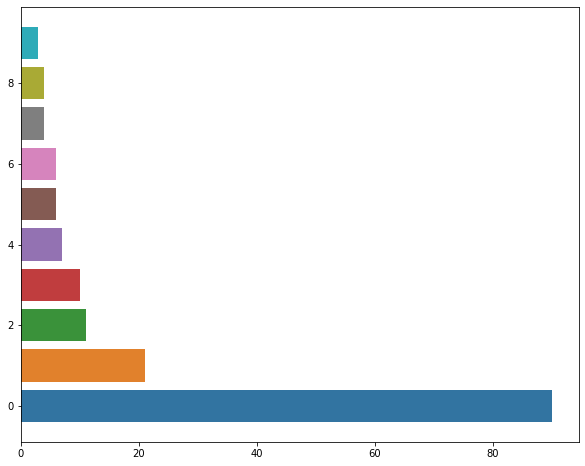

In [11]:
count = 0
while count < 100:
    
    time.sleep( 3 )
    top_10_tweets = sqlContext.sql( 'Select tag, count from tweets' )
    top_10_df = top_10_tweets.toPandas()
    display.clear_output(wait=True)
    plt.figure( figsize = ( 10, 8 ) )
    sns.barplot( x="count", y="tag", data=top_10_df)
    plt.show()
    count = count + 1

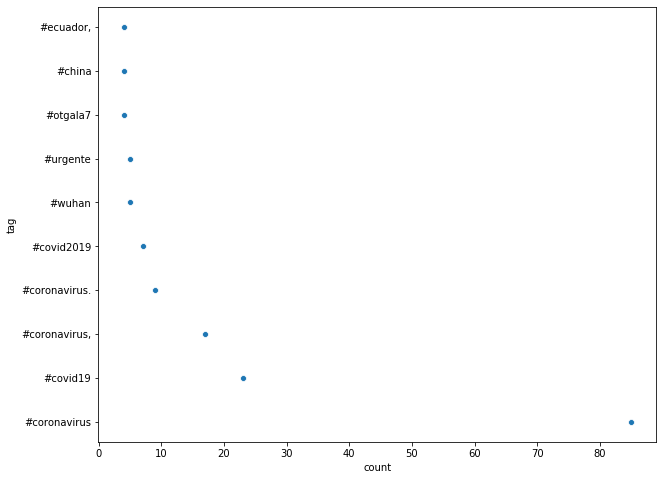

KeyboardInterrupt: 

In [18]:
count = 0
while count < 100:
    
    time.sleep( 3 )
    top_10_tweets = sqlContext.sql( 'Select tag, count from tweets' )
    top_10_df = top_10_tweets.toPandas()
    display.clear_output(wait=True)
    plt.figure( figsize = ( 10, 8 ) )
    sns.scatterplot( x="count", y="tag",data=top_10_df)
    plt.show()
    count = count + 1

In [72]:
ssc.stop()
print("Stopping the Streams")

Stopping the Streams


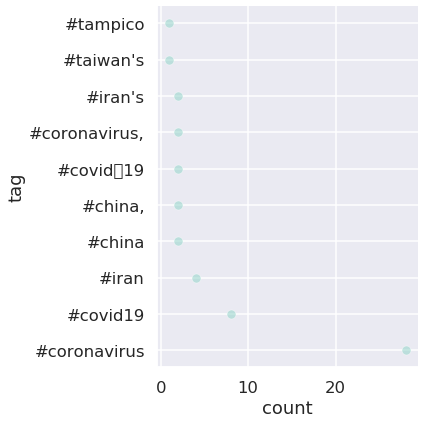

In [28]:
top_10_tweets = sqlContext.sql( 'Select tag, count from tweets' )
top_10_df = top_10_tweets.toPandas()
display.clear_output(wait=True)
sns.relplot(x="count", y="tag",sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=top_10_df)

In [13]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [14]:
newdata= testdata.toPandas()
newdata

,tag
0,#coronavirus
1,#covid19
2,#coronavirus.
3,"#coronavirus,"
4,#otgala7
5,#coronavirusrt
6,#c…rt
7,"#ecuador,"
8,#iran
9,#coronovirius


In [15]:
import re
newdata['tag'] = newdata['tag'].map(lambda x: re.sub(r'#', '', x))

In [16]:
text = newdata['tag'].values.tolist()
text = ','.join(text)
text

'coronavirus,covid19,coronavirus.,coronavirus,,otgala7,coronavirusrt,c…rt,ecuador,,iran,coronovirius'

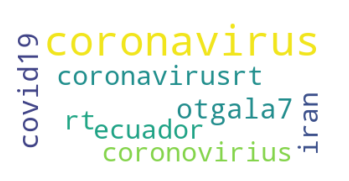

In [17]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()